In [ ]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import json

IMG_SIZE = (100, 100)
BATCH_SIZE = 32
VARIANCE_THRESHOLD = 0.95 # 98% varianza

# Path directories
TRAIN_DIR = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training'
TEST_DIR = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Test'

# ==========  explorative analysis of the dataset ==========
print("="*60)
print(" explorative analysis of the dataset ")
print("="*60)

def analyze_dataset(directory, set_name="Dataset"):
    """structure and distribution dataset analysis"""
    class_counts = {}
    total_images = 0
    
    classes = sorted(os.listdir(directory))
    
    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
        
        count = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = count
        total_images += count
    
    return class_counts, total_images, classes

2025-12-14 10:34:08.606884: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765708448.851314      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765708448.922727      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

ANALISI ESPLORATIVA DEL DATASET


Training Set:
  - Numero classi: 232
  - Totale immagini: 122118

Test Set:
  - Numero classi: 232
  - Totale immagini: 40715

 10 most represented classes
 1. Grape Blue 1                  :  984 immagini
 2. Cucumber 6                    :  977 immagini
 3. Cherimoya 1                   :  972 immagini
 4. Pear 9                        :  928 immagini
 5. Peach 3                       :  927 immagini
 6. Plum 3                        :  900 immagini
 7. Onion 2                       :  765 immagini
 8. Quince 4                      :  750 immagini
 9. Avocado Black 2               :  738 immagini
10. Cherry 2                      :  738 immagini


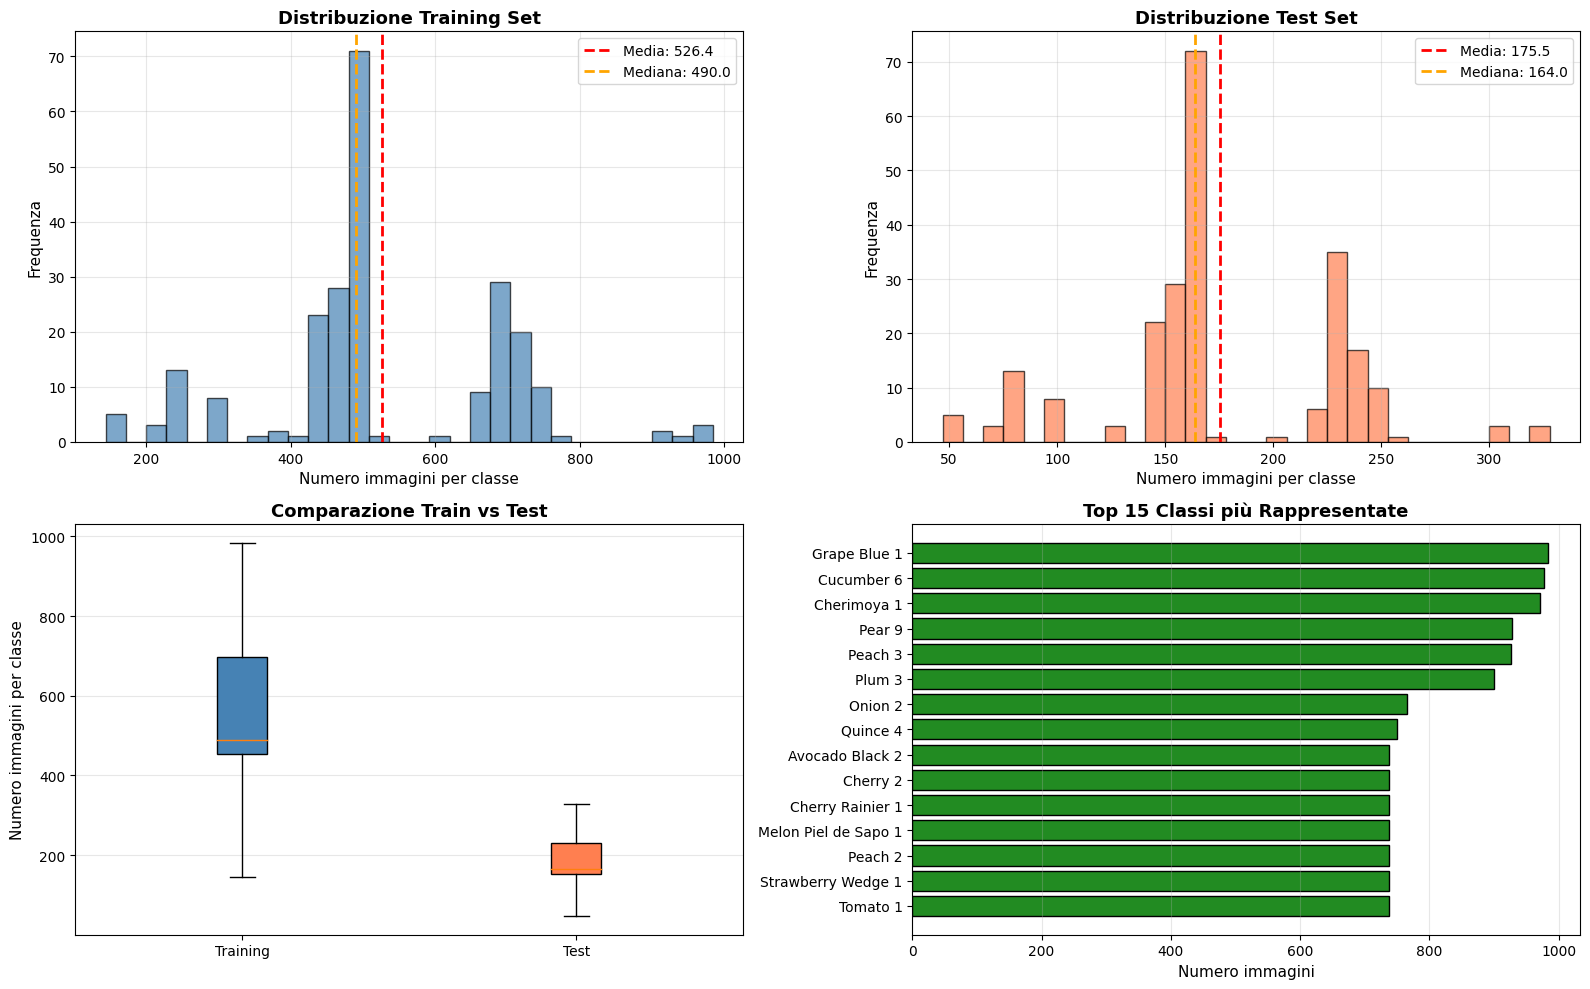

In [ ]:
train_counts, train_total, train_classes = analyze_dataset(TRAIN_DIR, "Training")
test_counts, test_total, test_classes = analyze_dataset(TEST_DIR, "Test")

print(f"Training Set:")
print(f"  - Numero classi: {len(train_classes)}")
print(f"  - Totale immagini: {train_total}")
print(f"\nTest Set:")
print(f"  - Numero classi: {len(test_classes)}")
print(f"  - Totale immagini: {test_total}")

# Top e Bottom classes
print(f"\n 10 most represented classes")
sorted_train = sorted(train_counts.items(), key=lambda x: x[1], reverse=True)
for i, (class_name, count) in enumerate(sorted_train[:10], 1):
    print(f"{i:2d}. {class_name:30s}: {count:4d} immagini")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

ax1 = axes[0, 0]
counts_train = list(train_counts.values())
ax1.hist(counts_train, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(np.mean(counts_train), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(counts_train):.1f}')
ax1.axvline(np.median(counts_train), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {np.median(counts_train):.1f}')
ax1.set_xlabel('Numero immagini per classe', fontsize=11)
ax1.set_ylabel('Frequenza', fontsize=11)
ax1.set_title('Distribuzione Training Set', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
counts_test = list(test_counts.values())
ax2.hist(counts_test, bins=30, color='coral', edgecolor='black', alpha=0.7)
ax2.axvline(np.mean(counts_test), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(counts_test):.1f}')
ax2.axvline(np.median(counts_test), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {np.median(counts_test):.1f}')
ax2.set_xlabel('Numero immagini per classe', fontsize=11)
ax2.set_ylabel('Frequenza', fontsize=11)
ax2.set_title('Distribuzione Test Set', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
data_to_plot = [counts_train, counts_test]
bp = ax3.boxplot(data_to_plot, labels=['Training', 'Test'], patch_artist=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][1].set_facecolor('coral')
ax3.set_ylabel('Numero immagini per classe', fontsize=11)
ax3.set_title('Comparazione Train vs Test', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Barplot top 15 classes
ax4 = axes[1, 1]
top_15 = sorted_train[:15]
classes_15 = [c[0][:20] for c in top_15]  
counts_15 = [c[1] for c in top_15]
bars = ax4.barh(classes_15, counts_15, color='forestgreen', edgecolor='black')
ax4.set_xlabel('Numero immagini', fontsize=11)
ax4.set_title('Top 15 Classi più Rappresentate', fontsize=13, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()



🖼️  ESEMPI IMMAGINI DA CLASSI DIVERSE


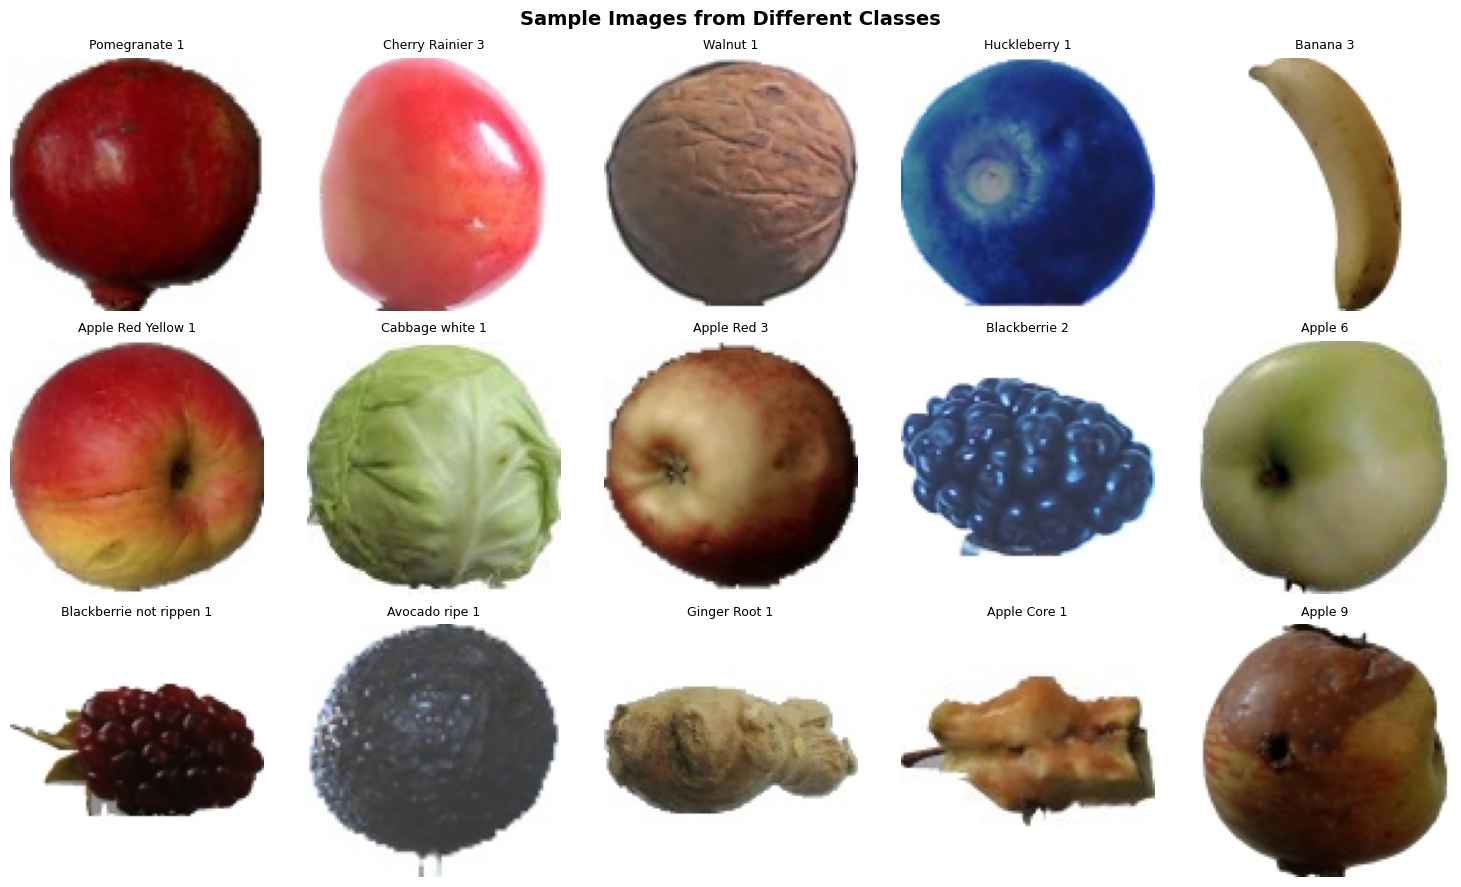

In [ ]:
print(f"\n examples images of random classes")
print(f"{'='*60}")

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()
sample_classes = np.random.choice(train_classes, size=min(15, len(train_classes)), replace=False)

for idx, class_name in enumerate(sample_classes):
    class_path = os.path.join(TRAIN_DIR, class_name)
    images = os.listdir(class_path)
    
    if images:
        img_path = os.path.join(class_path, images[0])
        img = load_img(img_path, target_size=IMG_SIZE)
        
        axes[idx].imshow(img)
        axes[idx].set_title(class_name[:25], fontsize=9)
        axes[idx].axis('off')

plt.suptitle('Sample Images from Different Classes', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

SELEZIONE CLASSI BASATA SU COPERTURA VARIANZA

🎯 Target: coprire 95.0% delle immagini totali

Classe   1: Grape Blue 1                   - Copertura:  0.81%
Classe   2: Cucumber 6                     - Copertura:  1.61%
Classe   3: Cherimoya 1                    - Copertura:  2.40%
Classe   4: Pear 9                         - Copertura:  3.16%
Classe   5: Peach 3                        - Copertura:  3.92%
Classe   6: Plum 3                         - Copertura:  4.66%
Classe   7: Onion 2                        - Copertura:  5.28%
Classe   8: Quince 4                       - Copertura:  5.90%
Classe   9: Avocado Black 2                - Copertura:  6.50%
Classe  10: Cherry 2                       - Copertura:  7.11%
Classe  20: Quince 2                       - Copertura: 13.13%
Classe  30: Peach 6                        - Copertura: 19.03%
Classe  40: Avocado Green 1                - Copertura: 24.81%
Classe  50: Cactus fruit green 1           - Copertura: 30.55%
Classe  60: Apple 7     

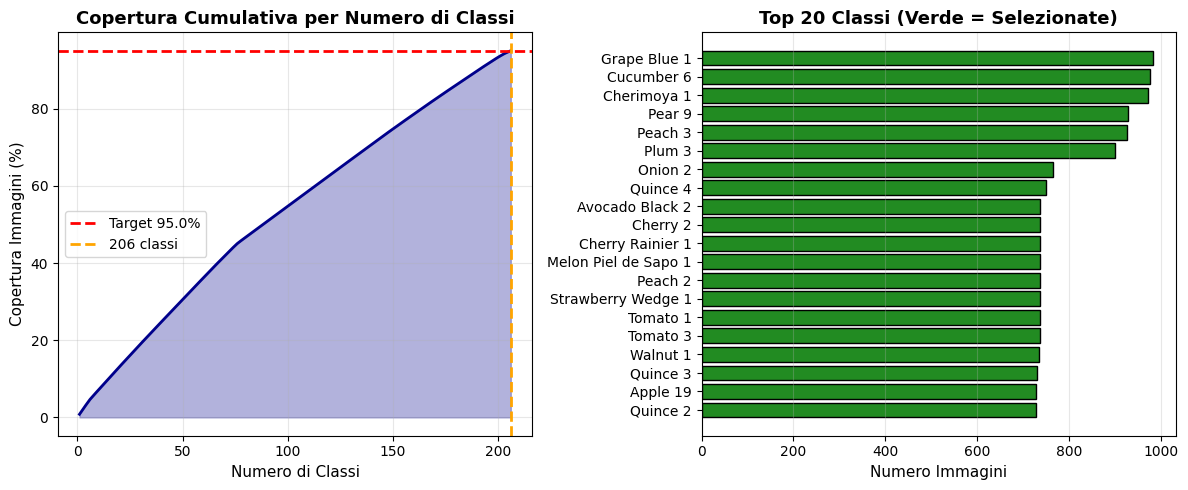


📋 LISTA CLASSI SELEZIONATE (206):
 1. Grape Blue 1                   - Train:  984, Test: 328
 2. Cucumber 6                     - Train:  977, Test: 325
 3. Cherimoya 1                    - Train:  972, Test: 320
 4. Pear 9                         - Train:  928, Test: 308
 5. Peach 3                        - Train:  927, Test: 306
 6. Plum 3                         - Train:  900, Test: 304
 7. Onion 2                        - Train:  765, Test: 255
 8. Quince 4                       - Train:  750, Test: 249
 9. Avocado Black 2                - Train:  738, Test: 246
10. Cherry 2                       - Train:  738, Test: 246
11. Cherry Rainier 1               - Train:  738, Test: 246
12. Melon Piel de Sapo 1           - Train:  738, Test: 246
13. Peach 2                        - Train:  738, Test: 246
14. Strawberry Wedge 1             - Train:  738, Test: 246
15. Tomato 1                       - Train:  738, Test: 246
16. Tomato 3                       - Train:  738, Test: 246
17. W

KeyboardInterrupt: 

In [ ]:
# ========== class selection to cover 95% variance  ==========
print("="*60)
print(" class selection variance-based")
print("="*60)

sorted_train = sorted(train_counts.items(), key=lambda x: x[1], reverse=True)
total_images = sum(train_counts.values())

cumulative_images = 0
cumulative_percentages = []
selected_classes = []

TARGET_VARIANCE = 0.95  

print(f"\n Target: covering {TARGET_VARIANCE*100}% of total images")
print(f"{'='*60}\n")

for class_name, count in sorted_train:
    cumulative_images += count
    cumulative_pct = cumulative_images / total_images
    cumulative_percentages.append(cumulative_pct)
    selected_classes.append(class_name)
    
    if len(selected_classes) <= 10 or len(selected_classes) % 10 == 0:
        print(f"Classe {len(selected_classes):3d}: {class_name:30s} - Coverage: {cumulative_pct*100:5.2f}%")
    
    if cumulative_pct >= TARGET_VARIANCE:
        break

TOP_N_CLASSES = len(selected_classes)

print(f"\n{'='*60}")
print(f"Selected Classes: {TOP_N_CLASSES}")
print(f"{'='*60}")

# final statistics
total_selected_train = sum([train_counts[c] for c in selected_classes])
total_selected_test = sum([test_counts.get(c, 0) for c in selected_classes])

print(f"\n final statistics:")
print(f"{'─'*60}")
print(f"Classi originali:         {len(train_classes)}")
print(f"Classi selezionate:       {TOP_N_CLASSES}")
print(f"Riduzione:                {(1-TOP_N_CLASSES/len(train_classes))*100:.1f}%")
print(f"{'─'*60}")
print(f"Immagini Training:        {total_selected_train:,} / {train_total:,} ({total_selected_train/train_total*100:.2f}%)")
print(f"Immagini Test:            {total_selected_test:,} / {test_total:,} ({total_selected_test/test_total*100:.2f}%)")
print(f"{'─'*60}")
print(f"Copertura raggiunta:      {cumulative_images/total_images*100:.2f}%")
print(f"{'='*60}\n")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_percentages)+1), 
         [p*100 for p in cumulative_percentages], 
         linewidth=2, color='darkblue')
plt.axhline(y=TARGET_VARIANCE*100, color='red', linestyle='--', linewidth=2, 
            label=f'Target {TARGET_VARIANCE*100}%')
plt.axvline(x=TOP_N_CLASSES, color='orange', linestyle='--', linewidth=2,
            label=f'{TOP_N_CLASSES} classi')
plt.fill_between(range(1, len(cumulative_percentages)+1), 
                 [p*100 for p in cumulative_percentages], 
                 alpha=0.3, color='darkblue')
plt.xlabel('Numero di Classi', fontsize=11)
plt.ylabel('Copertura Immagini (%)', fontsize=11)
plt.title('Copertura Cumulativa per Numero di Classi', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
top_20_classes = [c[0][:25] for c in sorted_train[:20]]
top_20_counts = [c[1] for c in sorted_train[:20]]
colors = ['forestgreen' if i < TOP_N_CLASSES else 'lightgray' for i in range(20)]
plt.barh(top_20_classes, top_20_counts, color=colors, edgecolor='black')
plt.xlabel('Numero Immagini', fontsize=11)
plt.title(f'Top 20 Classi (Verde = Selezionate)', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\n📋list of the selected classes({TOP_N_CLASSES}):")
print(f"{'='*60}")
for i, class_name in enumerate(selected_classes, 1):
    train_count = train_counts[class_name]
    test_count = test_counts.get(class_name, 0)
    print(f"{i:2d}. {class_name:30s} - Train: {train_count:4d}, Test: {test_count:3d}")
print(f"{'='*60}\n")

import shutil
import tempfile

TEMP_TRAIN_DIR = tempfile.mkdtemp()
TEMP_TEST_DIR = tempfile.mkdtemp()

print(" copy selected classes to temporary directories...")
for class_name in selected_classes:
    # Training
    src_train = os.path.join(TRAIN_DIR, class_name)
    dst_train = os.path.join(TEMP_TRAIN_DIR, class_name)
    if os.path.exists(src_train):
        shutil.copytree(src_train, dst_train)
    
    # Test
    src_test = os.path.join(TEST_DIR, class_name)
    dst_test = os.path.join(TEMP_TEST_DIR, class_name)
    if os.path.exists(src_test):
        shutil.copytree(src_test, dst_test)

print("Copied classes to temporary directories!\n")

2025-12-16 20:05:03.919115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765915504.185650      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765915504.265738      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

PIPELINE: PCA + CNN

 STEP 1: Caricamento campione per PCA
Caricamento da 232 classi...
  30/232 classi processate...
  60/232 classi processate...
  90/232 classi processate...
  120/232 classi processate...
  150/232 classi processate...
  180/232 classi processate...
  210/232 classi processate...

  Campione caricato: 11600 immagini
 Features originali: 30,000 (100x100x3)

 STEP 2: Training PCA (500 componenti)
------------------------------------------------------------

 PCA training completato!
────────────────────────────────────────────────────────────
Features PRIMA:            30,000
Features DOPO:                500
Riduzione:                   98.3%
Varianza spiegata:          97.45%
────────────────────────────────────────────────────────────


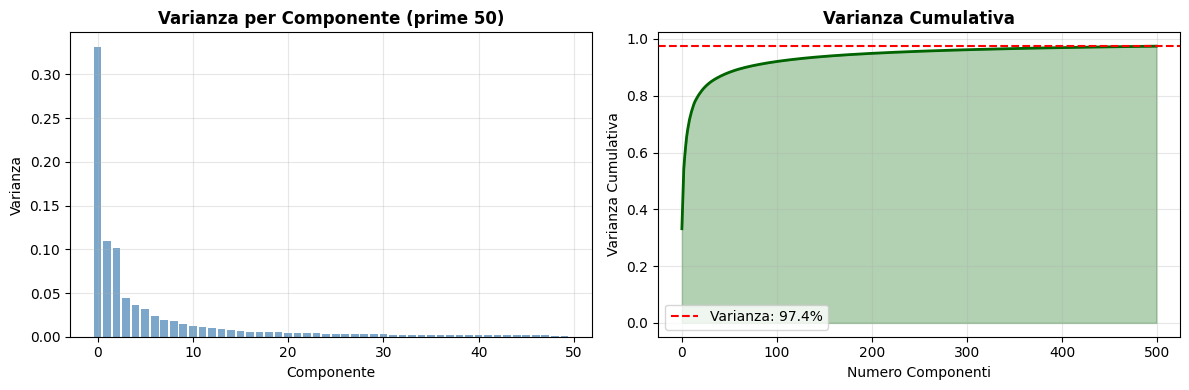


 STEP 3: Caricamento dataset con trasformazione PCA
------------------------------------------------------------
Found 122118 images belonging to 232 classes.
Caricamento da Training...
  100 batch processati...
  200 batch processati...
  300 batch processati...
  400 batch processati...
  500 batch processati...
  600 batch processati...
 Training: 19200 immagini x 500 features PCA

Found 40715 images belonging to 232 classes.
Caricamento da Test...
  100 batch processati...
  200 batch processati...
 Test: 6400 immagini x 500 features PCA

 Numero classi: 232

  STEP 4: Costruzione modello CNN
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-16 20:12:54.149558: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 496, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 246, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 123, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 121, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       491,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 232)            │        29,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 586,184 (2.24 MB)

 Trainable params: 586,184 (2.24 MB)

 Non-trainable params: 0 (0.00 B)


 STEP 5: Training del modello

Epoch 1/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - accuracy: 0.0097 - loss: 5.5041 - val_accuracy: 0.1517 - val_loss: 3.9233
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.1654 - loss: 3.7033 - val_accuracy: 0.4984 - val_loss: 2.2498
Epoch 3/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.3714 - loss: 2.4903 - val_accuracy: 0.6327 - val_loss: 1.7275
Epoch 4/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5102 - loss: 1.9382 - val_accuracy: 0.6984 - val_loss: 1.4415
Epoch 5/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.5764 - loss: 1.6740 - val_accuracy: 0.7075 - val_loss: 1.3538
Epoch 6/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.6232 - loss: 1.5023 - val_accuracy: 0.7462 - val_loss: 1.2358
Epoch 7/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 74ms/step - accuracy: 0.6632 - loss: 1.3655 - val_accuracy: 0.7642 - val_loss: 1.1658
Epoch 8/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - ac

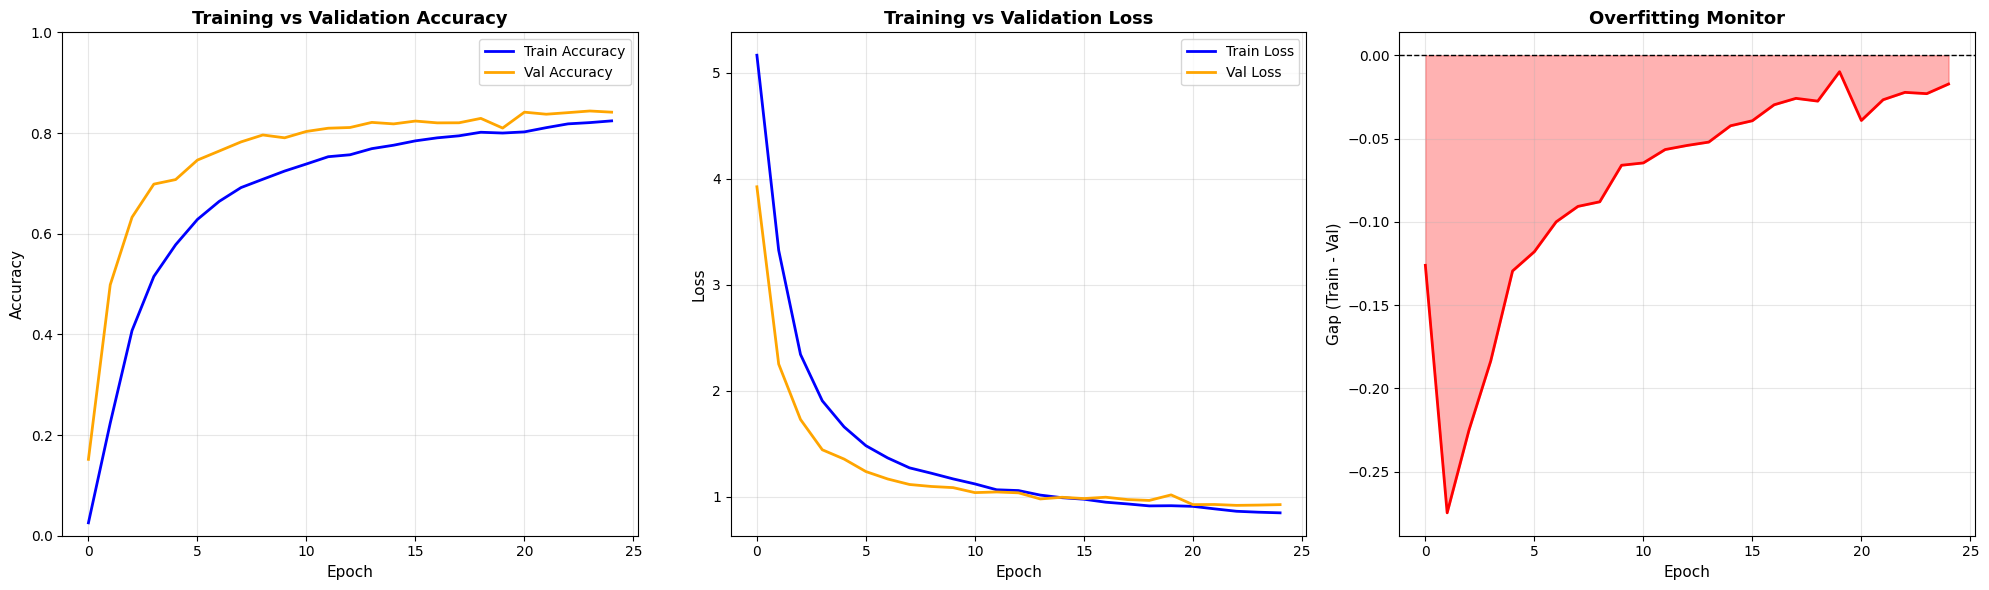


RIEPILOGO FINALE

Dataset:
  • Features: 30,000 → 500 (PCA)
  • Riduzione: 98.3%
  • Training samples: 19,200
  • Test samples: 6,400
  • Classi: 232

Performance Finale:
  • Train Accuracy: 82.41%
  • Val Accuracy: 84.14%
  • Train Loss: 0.8462
  • Val Loss: 0.9238
  
  • Best Val Accuracy: 84.38%
  • Overfitting gap: -1.73%

PCA:
  • Varianza preservata: 97.45%


 STEP 8: Test predizione
------------------------------------------------------------


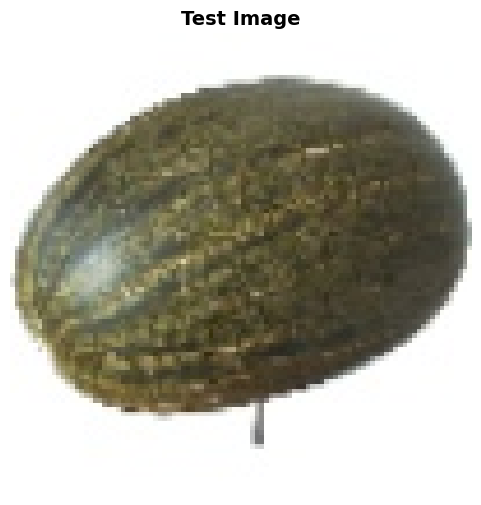


 Predicted: Melon Piel de Sapo 1
   Confidence: 99.20%

 Top 5 predictions:
   1. Melon Piel de Sapo 1      - 99.20%
   2. Apple 6                   -  0.45%
   3. Avocado ripe 1            -  0.20%
   4. Mango 1                   -  0.09%
   5. Potato Sweet 1            -  0.01%


('Melon Piel de Sapo 1', 0.99201196)

In [ ]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import json


IMG_SIZE = (100, 100)
BATCH_SIZE = 64
N_COMPONENTS_PCA = 500  

# Path directories
TRAIN_DIR = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Training'
TEST_DIR = '/kaggle/input/fruits/fruits-360_100x100/fruits-360/Test'

print("="*60)
print("PIPELINE: PCA + CNN")
print("="*60)

print("\n STEP 1: loading samples for PCA ")
print("="*60)

def load_sample_for_pca(directory, samples_per_class=50):
    images = []
    
    classes = os.listdir(directory)
    print(f"UPLOADING  {len(classes)} classes...")
    
    for idx, class_name in enumerate(classes):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
            
        files = os.listdir(class_path)[:samples_per_class]
        
        for file in files:
            img_path = os.path.join(class_path, file)
            try:
                img = load_img(img_path, target_size=IMG_SIZE)
                img_array = img_to_array(img) / 255.0
                images.append(img_array.flatten())
            except:
                continue
        
        if (idx + 1) % 30 == 0:
            print(f"  {idx+1}/{len(classes)} classi processate...")
    
    return np.array(images)

# upload sample images
sample_images = load_sample_for_pca(TRAIN_DIR, samples_per_class=50)
original_features = sample_images.shape[1]

print(f"\n  uploaded samples: {sample_images.shape[0]} immagini")
print(f" Original Features : {original_features:,} ({IMG_SIZE[0]}x{IMG_SIZE[1]}x3)")

# ========== STEP 2: FIT PCA ==========
print(f"\n STEP 2: Training PCA ({N_COMPONENTS_PCA} componenti)")
print("-"*60)

pca = PCA(n_components=N_COMPONENTS_PCA)
pca.fit(sample_images)

explained_variance = sum(pca.explained_variance_ratio_)
reduction_percent = (1 - N_COMPONENTS_PCA/original_features) * 100

print(f"\n PCA training completato!")
print(f"{'─'*60}")
print(f"Features PRIMA:        {original_features:>10,}")
print(f"Features DOPO:         {N_COMPONENTS_PCA:>10,}")
print(f"Riduzione:             {reduction_percent:>10.1f}%")
print(f"Varianza spiegata:     {explained_variance*100:>10.2f}%")
print(f"{'─'*60}")

# Plot variance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(range(min(50, N_COMPONENTS_PCA)), pca.explained_variance_ratio_[:50], 
        color='steelblue', alpha=0.7)
plt.xlabel('Component', fontsize=10)
plt.ylabel('Variance', fontsize=10)
plt.title('Varianza per Componente (prime 50)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum, linewidth=2, color='darkgreen')
plt.axhline(y=explained_variance, color='red', linestyle='--', 
            label=f'Varianza: {explained_variance*100:.1f}%')
plt.fill_between(range(len(cumsum)), cumsum, alpha=0.3, color='darkgreen')
plt.xlabel('Components Number', fontsize=10)
plt.ylabel('Cumulative Variance', fontsize=10)
plt.title('Cumulative Variance', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PCA DATASET   
print(f"\n STEP 3: uploading PCA Dataset")
print("-"*60)

def load_dataset_with_pca(directory, pca_model, img_size, max_batches=500):
    datagen = ImageDataGenerator(rescale=1./255)
    
    temp_gen = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )
    
    all_features = []
    all_labels = []
    
    print(f"Upload from {directory.split('/')[-1]}...")
    for i in range(min(len(temp_gen), max_batches)):
        images, labels = temp_gen[i]
        
        #  PCA
        flat_images = images.reshape(images.shape[0], -1)
        pca_features = pca_model.transform(flat_images)
        
        all_features.append(pca_features)
        all_labels.append(labels)
        
        if (i + 1) % 100 == 0:
            print(f"  {i+1} batch processati...")
    
    X = np.concatenate(all_features, axis=0)
    y = np.concatenate(all_labels, axis=0)
    
    return X, y, temp_gen.class_indices

# Upload training
X_train, y_train, class_indices = load_dataset_with_pca(TRAIN_DIR, pca, IMG_SIZE, max_batches=600)
print(f" Training: {X_train.shape[0]} images x {X_train.shape[1]} features PCA\n")

# Upload test
X_test, y_test, _ = load_dataset_with_pca(TEST_DIR, pca, IMG_SIZE, max_batches=200)
print(f" Test: {X_test.shape[0]} images x {X_test.shape[1]} features PCA\n")

num_classes = len(class_indices)
print(f" Numero classi: {num_classes}")

# ========== STEP 4: model CNN 1D ==========
print(f"\n  STEP 4: cnn model construction")
print("-"*60)

# Reshape  CNN 1D: (batch, features, 1)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    # CNN 1D layers
    Conv1D(128, kernel_size=5, activation='relu', input_shape=(N_COMPONENTS_PCA, 1)),  # downsizing to 1D
    MaxPooling1D(pool_size=2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    # Fully connected
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')        # output layer
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',      
    metrics=['accuracy']
)

model.summary()

# TRAINING 
print("\n" + "="*60)
print(" STEP 5: Training del modello")
print("="*60 + "\n")

history = model.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=25,
    batch_size=BATCH_SIZE,
    verbose=1
)

#  history
with open("history.json", "w") as f:
    json.dump(history.history, f)

print("\n  Training completed!")
 
print("\n" + "-"*60)
print(" STEP 6: final evaluation")
print("-"*60)

loss, acc = model.evaluate(X_test_cnn, y_test, batch_size=BATCH_SIZE, verbose=0)

print(f"\n Test Accuracy: {acc*100:.2f}%")
print(f" Test Loss: {loss:.4f}")

# PLOT results 
print("\n STEP 7: results visualization")
print("="*60 + "\n")

fig, axes = plt.subplots(1,3, figsize=(20,6))

# 1. Training vs Validation Accuracy
ax1 = axes[0]
ax1.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, color='blue')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2, color='orange')
ax1.set_xlabel('Epoch', fontsize=11)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('Training vs Validation Accuracy', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# 2. Training vs Validation Loss
ax2 = axes[1]
ax2.plot(history.history['loss'], label='Train Loss', linewidth=2, color='blue')
ax2.plot(history.history['val_loss'], label='Val Loss', linewidth=2, color='orange')
ax2.set_xlabel('Epoch', fontsize=11)
ax2.set_ylabel('Loss', fontsize=11)
ax2.set_title('Training vs Validation Loss', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Overfitting check
ax3 = axes[2]
gap = np.array(history.history['accuracy']) - np.array(history.history['val_accuracy'])
ax3.plot(gap, linewidth=2, color='red')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax3.fill_between(range(len(gap)), gap, alpha=0.3, color='red')
ax3.set_xlabel('Epoch', fontsize=11)
ax3.set_ylabel('Gap (Train - Val)', fontsize=11)
ax3.set_title('Overfitting Monitor', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
best_val_acc = max(history.history['val_accuracy'])

summary_text = f"""
final review

Dataset:
  • Features: {original_features:,} → {N_COMPONENTS_PCA} (PCA)
  • Reduction: {reduction_percent:.1f}%
  • Training samples: {X_train.shape[0]:,}
  • Test samples: {X_test.shape[0]:,}
  • Classes: {num_classes}

Final Performance :
  • Train Accuracy: {final_train_acc*100:.2f}%
  • Val Accuracy: {final_val_acc*100:.2f}%
  • Train Loss: {final_train_loss:.4f}
  • Val Loss: {final_val_loss:.4f}
  
  • Best Val Accuracy: {best_val_acc*100:.2f}%
  • Overfitting gap: {(final_train_acc-final_val_acc)*100:.2f}%

PCA:
  • Kept variance: {explained_variance*100:.2f}%
"""

print(summary_text)


# ========== STEP 8: prediction on examples ==========
print("\n STEP 8: test prediction")
print("-"*60)

def predict_image_pca(img_path, model, pca_model, img_size, class_names):
    """prediction with PCA + CNN"""
    img = load_img(img_path, target_size=img_size)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Test Image", fontsize=14, fontweight='bold')
    plt.show()

    img_array = img_to_array(img) / 255.0
    img_flat = img_array.flatten().reshape(1, -1)
    
    img_pca = pca_model.transform(img_flat)
    img_pca = img_pca.reshape(1, N_COMPONENTS_PCA, 1)
    
    prediction = model.predict(img_pca, verbose=0)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]
    
    # Top 5 predictions
    top5_idx = np.argsort(prediction[0])[-5:][::-1]
    
    labels = {v: k for k, v in class_names.items()}
    
    print(f"\n Predicted: {labels[predicted_class]}")
    print(f"   Confidence: {confidence*100:.2f}%")
    print(f"\n Top 5 predictions:")
    for i, idx in enumerate(top5_idx, 1):
        print(f"   {i}. {labels[idx]:25s} - {prediction[0][idx]*100:5.2f}%")
    
    return labels[predicted_class], confidence

first_class = os.listdir(TEST_DIR)[0]
first_image = os.listdir(os.path.join(TEST_DIR, first_class))[0]
img_path = os.path.join(TEST_DIR, first_class, first_image)

predict_image_pca(img_path, model, pca, IMG_SIZE, class_indices)
